In [1]:
import cv2

In [2]:
import urllib.request

In [3]:
import numpy as np

In [4]:
import glymur

In [5]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [6]:
%matplotlib inline

In [7]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png') # get the image

In [8]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8) # convert the image to a numpy.ndarray

In [9]:
img = cv2.imdecode(arr,-1) # Decompress the image

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to BGR -> RGB

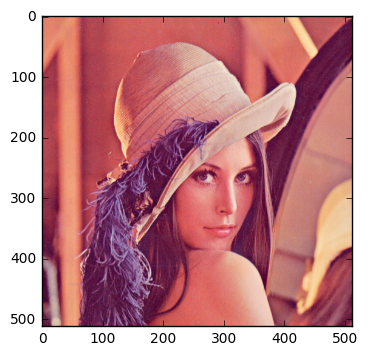

In [11]:
plt.imshow(img)

In [12]:
buf = img.copy() # Create a copy of arr

In [13]:
gaussian = [img] # The base of the gaussian pyramid is buf

In [14]:
# Create the rest of the gaussian pyramid
for i in range(5):
    print(i, len(gaussian), len(gaussian[i]))
    buf = cv2.pyrDown(buf)
    gaussian.append(buf)

0 1 512
1 2 256
2 3 128
3 4 64
4 5 32


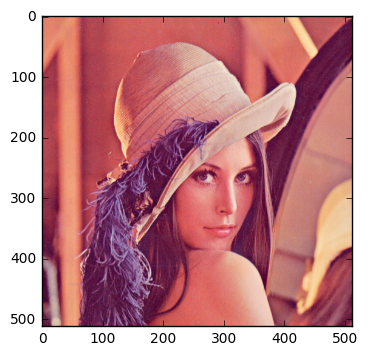

In [15]:
plt.imshow(gaussian[0]);

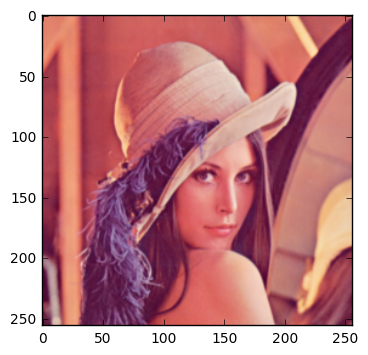

In [16]:
plt.imshow(gaussian[1])

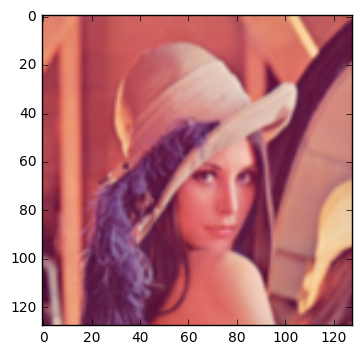

In [17]:
plt.imshow(gaussian[2])

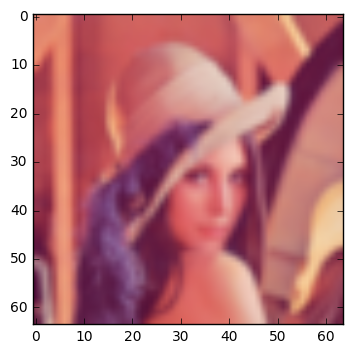

In [18]:
plt.imshow(gaussian[3])

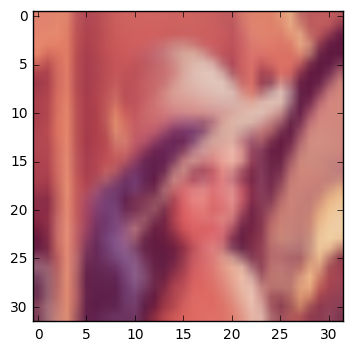

In [19]:
plt.imshow(gaussian[4])

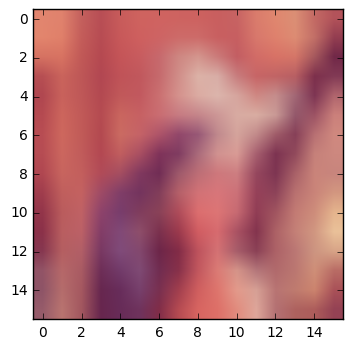

In [20]:
plt.imshow(gaussian[5])

In [21]:
laplacian = [gaussian[5]] # The upper level of the pyramid

In [22]:
# Create the rest of the laplacian pyramid
for i in range(5):
    interpolation = cv2.pyrUp(gaussian[5-i])
    #difference = cv2.subtract(gaussian[5-i-1],interpolation)
    difference = gaussian[5-i-1] - interpolation
    laplacian.append(difference)

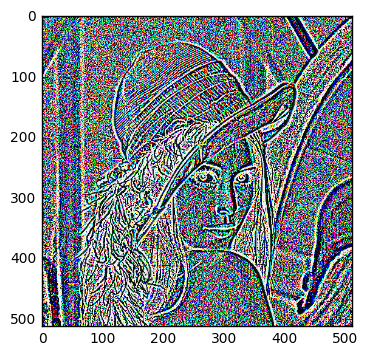

In [23]:
plt.imshow(laplacian[5])

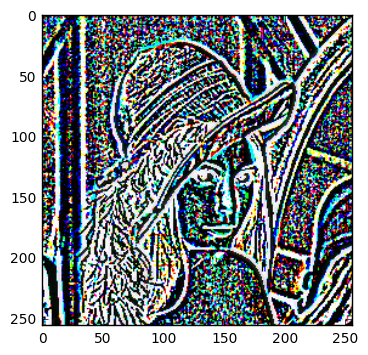

In [24]:
plt.imshow(laplacian[4])

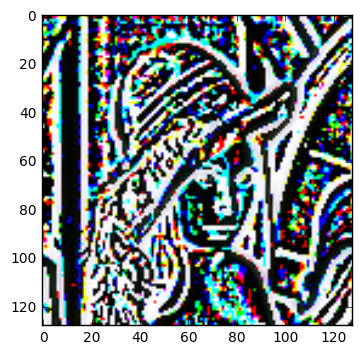

In [25]:
plt.imshow(laplacian[3])

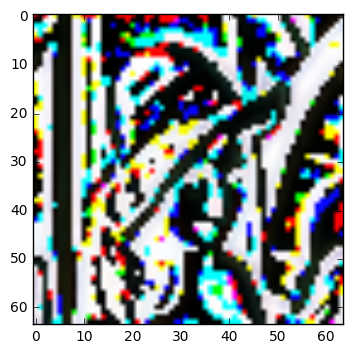

In [26]:
plt.imshow(laplacian[2])

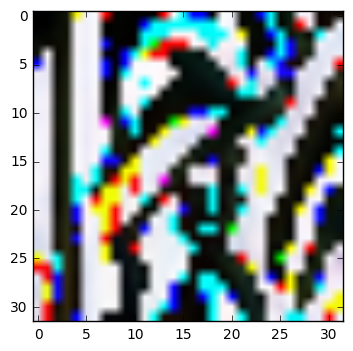

In [27]:
plt.imshow(laplacian[1])

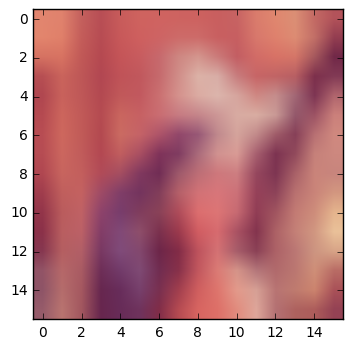

In [28]:
plt.imshow(laplacian[0])

In [29]:
# Reconstruction of the image using the laplacian pyramid
reconstruction = laplacian[0]
for i in range(5):
    reconstruction = cv2.pyrUp(reconstruction)
    reconstruction = reconstruction + laplacian[i+1]
    #reconstruction = cv2.add(reconstruction, np.uint8(laplacian[i+1]/0.5))

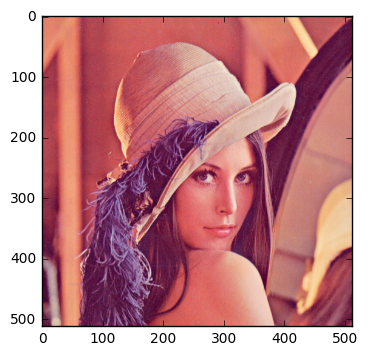

In [30]:
plt.imshow(reconstruction)

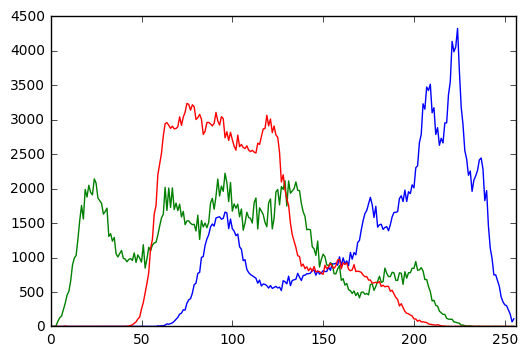

In [31]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([reconstruction],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

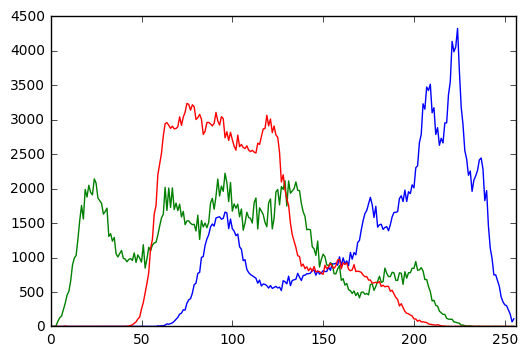

In [32]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [42]:
jp2 = glymur.Jp2k('lena.jp2', data=img)

In [55]:
for i in range(5):
    jp2 = glymur.Jp2k('laplacian_{}.jp2'.format(i+1), data=laplacian[i+1])
    #print (jp2)

File:  laplacian_1.jp2
JPEG 2000 Signature Box (jP  ) @ (0, 12)
    Signature:  0d0a870a
File Type Box (ftyp) @ (12, 20)
    Brand:  jp2 
    Compatibility:  ['jp2 ']
JP2 Header Box (jp2h) @ (32, 45)
    Image Header Box (ihdr) @ (40, 22)
        Size:  [32 32 3]
        Bitdepth:  8
        Signed:  False
        Compression:  wavelet
        Colorspace Unknown:  False
    Colour Specification Box (colr) @ (62, 15)
        Method:  enumerated colorspace
        Precedence:  0
        Colorspace:  sRGB
Contiguous Codestream Box (jp2c) @ (77, 3431)
    SOC marker segment @ (85, 0)
    SIZ marker segment @ (87, 47)
        Profile:  no profile
        Reference Grid Height, Width:  (32 x 32)
        Vertical, Horizontal Reference Grid Offset:  (0 x 0)
        Reference Tile Height, Width:  (32 x 32)
        Vertical, Horizontal Reference Tile Offset:  (0 x 0)
        Bitdepth:  (8, 8, 8)
        Signed:  (False, False, False)
        Vertical, Horizontal Subsampling:  ((1, 1), (1, 1), (1

In [50]:
jp2 = glymur.Jp2k('laplacian_0.jp2', data=laplacian[0])

OpenJPEGLibraryError: OpenJPEG library error:  Number of resolutions is too high in comparison to the size of tiles